In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(["PassengerId","Name"],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [5]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.shape

(891, 10)

In [8]:
#find null values  % of Cabin column
df.isnull().sum()*100/df.shape[0]

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
df.drop("Cabin",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [11]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

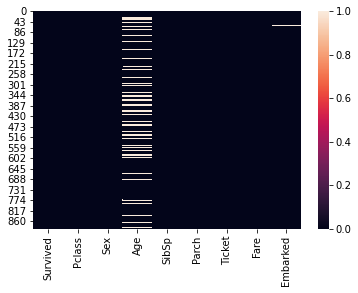

In [13]:
sb.heatmap(df.isnull())
plt.show()

In [14]:
df["Embarked"].dtype

dtype('O')

In [15]:
df["Embarked"]=df["Embarked"].astype("object")

In [16]:
df['Embarked'].dtype

dtype('O')

In [17]:
df["Embarked"].isnull().sum()/df.shape[0]*100

0.22446689113355783

In [18]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
data=round(df["Age"].mean(),2)
data

29.7

In [21]:
df["Age"]=df["Age"].fillna(data)

In [22]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 29.7 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [23]:
column=df.columns
column

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
for col in column:
    print(col)
    print(df[col].unique())

Survived
[0 1]
Pclass
[3 1 2]
Sex
['male' 'female']
Age
[22.   38.   26.   35.   29.7  54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6]
Ticket
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' 

In [25]:
df["Embarked"].replace(np.nan,"S",inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,29.7,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [26]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
df["Survived"].dtype

dtype('int64')

In [28]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [32]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
#split the data in two set cat and num
titanic_cat=df.select_dtypes(object)
titanic_cat

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S
...,...,...,...
886,male,211536,S
887,female,112053,S
888,female,W./C. 6607,S
889,male,111369,C


In [34]:
titanic_num=df.select_dtypes(["float64","int64"])
titanic_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,29.7,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [35]:
titanic_cat.columns

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [36]:
titanic_cat.head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


In [37]:
#Categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder

In [38]:
for col in titanic_cat:
    le=LabelEncoder()
    titanic_cat[col]=le.fit_transform(titanic_cat[col])
titanic_cat.head() 

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2


In [39]:
titanic_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sex       891 non-null    int32
 1   Ticket    891 non-null    int32
 2   Embarked  891 non-null    int32
dtypes: int32(3)
memory usage: 10.6 KB


In [40]:
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [41]:
#Handling Skewness
for col in titanic_num:
    print("Skewness of Column {} : {}".format(col,titanic_num[col].skew()))

Skewness of Column Survived : 0.4785234382949897
Skewness of Column Pclass : -0.6305479068752845
Skewness of Column Age : 0.43444755907138666
Skewness of Column SibSp : 3.6953517271630565
Skewness of Column Parch : 2.7491170471010933
Skewness of Column Fare : 4.787316519674893


Histogram :  Survived


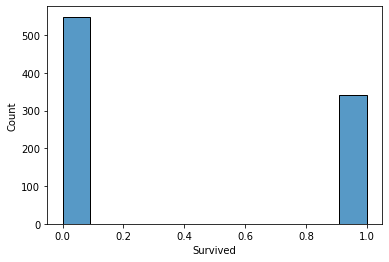

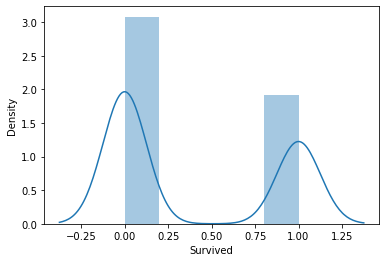

Histogram :  Pclass


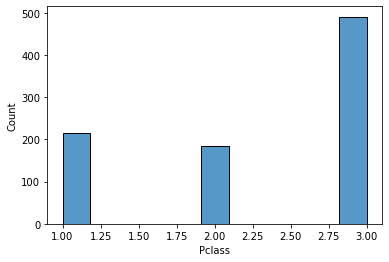

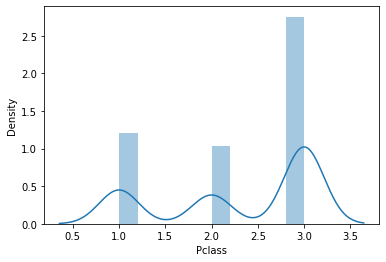

Histogram :  Age


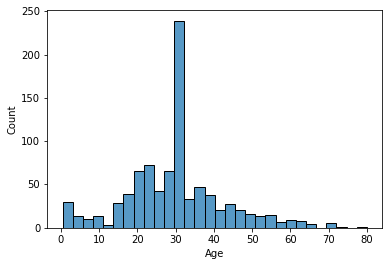

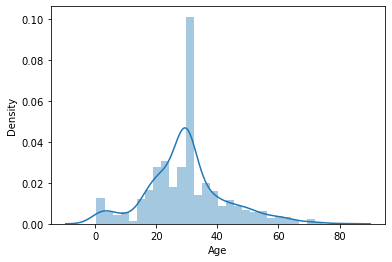

Histogram :  SibSp


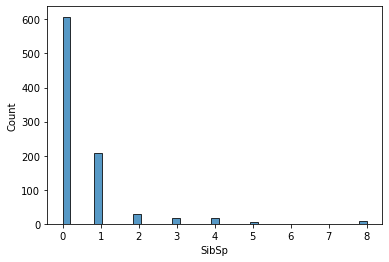

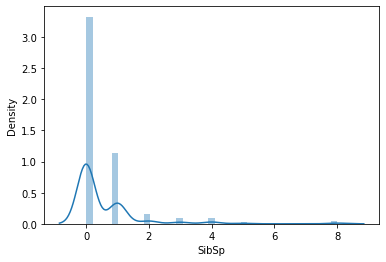

Histogram :  Parch


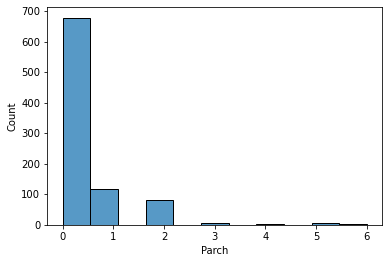

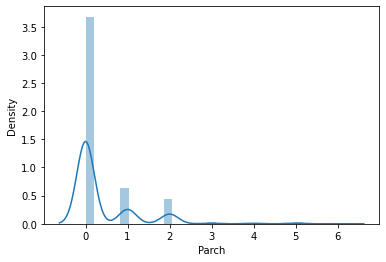

Histogram :  Fare


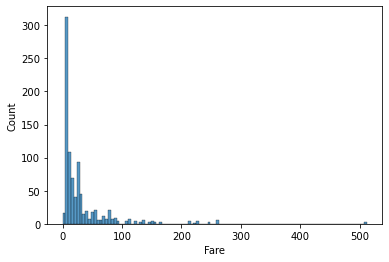

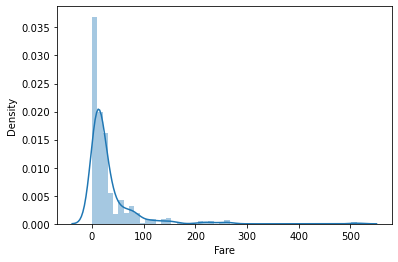

In [42]:
for col in titanic_num:
        print("Histogram : ",col)
        sb.histplot(titanic_num[col])
        plt.show()
        sb.distplot(titanic_num[col])
        plt.show()

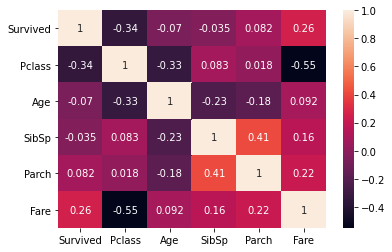

In [43]:
#correlation 
sb.heatmap(titanic_num.corr(),annot=True)
plt.show()

In [44]:
df["Age"]=np.sqrt(df["Age"])
df["Age"].skew()

-0.8254758364515753

In [45]:
df["Age"]=np.log(df["Age"])
df["Age"].skew()

-2.682376138853008

In [46]:
df["Pclass"]=np.log(df["Pclass"])
df["Pclass"].skew()

-0.8487956547574176

In [47]:
df["Pclass"]=np.sqrt(df["Pclass"])
df["Pclass"].skew()

-1.083362332266574

In [60]:
df_cat=df.select_dtypes(object)
df_cat

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S
...,...,...,...
886,male,211536,S
887,female,112053,S
888,female,W./C. 6607,S
889,male,111369,C


In [61]:
df_num=df.select_dtypes(["int64","float64"])
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1.048147,1.545521,1,0,7.2500
1,1,0.000000,1.818793,1,0,71.2833
2,1,1.048147,1.629048,0,0,7.9250
3,1,0.000000,1.777674,1,0,53.1000
4,0,1.048147,1.777674,0,0,8.0500
...,...,...,...,...,...,...
886,0,0.832555,1.647918,0,0,13.0000
887,1,0.000000,1.472219,0,0,30.0000
888,0,1.048147,1.695574,1,2,23.4500
889,1,0.000000,1.629048,0,0,30.0000


In [49]:
pd.get_dummies("Pclass")

,Pclass
0,1


# StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler=StandardScaler()
Standard_Scaler.fit_transform(df_num)
pd.DataFrame(Standard_Scaler.fit_transform(df_num))

,0,1,2,3,4,5
0,-0.789272,0.691001,-0.203296,0.432793,-0.473674,-0.502445
1,1.266990,-1.734407,0.570615,0.432793,-0.473674,0.786845
2,1.266990,0.691001,0.033254,-0.474545,-0.473674,-0.488854
3,1.266990,-1.734407,0.454165,0.432793,-0.473674,0.420730
4,-0.789272,0.691001,0.454165,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,-0.789272,0.192121,0.086695,-0.474545,-0.473674,-0.386671
887,1.266990,-1.734407,-0.410887,-0.474545,-0.473674,-0.044381
888,-0.789272,0.691001,0.221655,0.432793,2.008933,-0.176263
889,1.266990,-1.734407,0.033254,-0.474545,-0.473674,-0.044381


# MinMaxScaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_scaler.fit_transform(df_num)
pd.DataFrame(minmax_scaler.fit_transform(df_num))

,0,1,2,3,4,5
0,0.0,1.000000,0.754076,0.125,0.000000,0.014151
1,1.0,0.000000,0.858189,0.125,0.000000,0.139136
2,1.0,1.000000,0.785899,0.000,0.000000,0.015469
3,1.0,0.000000,0.842523,0.125,0.000000,0.103644
4,0.0,1.000000,0.842523,0.000,0.000000,0.015713
...,...,...,...,...,...,...
886,0.0,0.794311,0.793088,0.000,0.000000,0.025374
887,1.0,0.000000,0.726149,0.000,0.000000,0.058556
888,0.0,1.000000,0.811244,0.125,0.333333,0.045771
889,1.0,0.000000,0.785899,0.000,0.000000,0.058556
